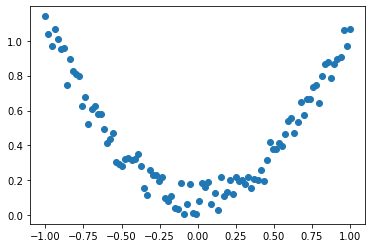

In [2]:
import torch
import matplotlib.pyplot as plt

x=torch.unsqueeze(torch.linspace(-1,1,100),dim=1)
y=x.pow(2)+0.2*torch.rand(x.size())

plt.scatter(x.data.numpy(),y.data.numpy())
plt.show()

In [5]:
import torch.nn.functional as F
import torch.nn as nn

class Net(nn.Module):
    def __init__(self,n_feature,n_hidden,n_output):
        super(Net,self).__init__()
        self.hidden=torch.nn.Linear(n_feature,n_hidden)
        self.predict=torch.nn.Linear(n_hidden,n_output)
        
    def forward(self,x):
        x=F.relu(self.hidden(x)) #激励函数（隐藏层的线性值）
                                 #类似于sigmoid回归（y=e）
        x=self.predict(x)
        return x


In [6]:
net=Net(n_feature=1,n_hidden=10,n_output=1)
print(net)

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


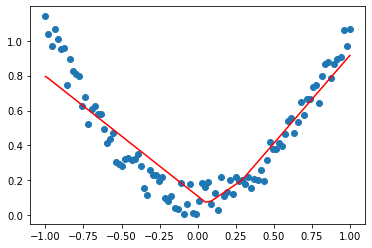

loss:0.013369


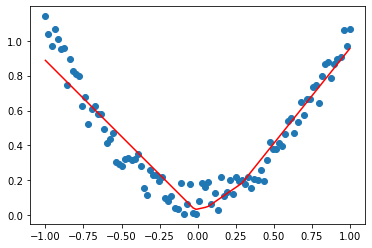

loss:0.008402


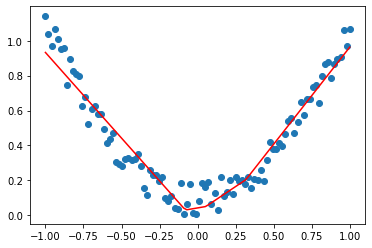

loss:0.006563


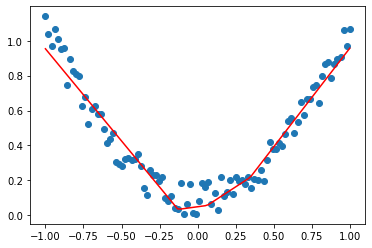

loss:0.005667


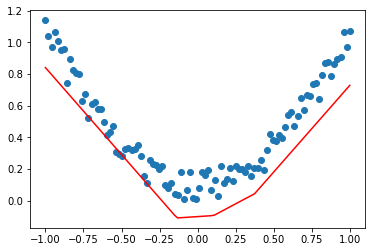

loss:0.038615


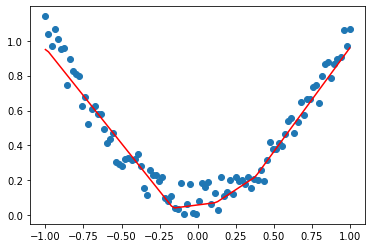

loss:0.005423


In [11]:
optimizer=torch.optim.SGD(net.parameters(),lr=0.2)
loss_func=torch.nn.MSELoss()

for t in range(300):
    predictions=net(x)
    loss=loss_func(predictions,y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if t%50==0:
        plt.cla()
        plt.scatter(x.data.numpy(),y.data.numpy())
        plt.plot(x.data.numpy(),predictions.data.numpy(),'r-')
        plt.pause(0.1)
        print('loss:%f'%loss)